Problem Statement

Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital. 

This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

Suppose you have been hired as Data Scientist of HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.
The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

Import modules

In [93]:
#import modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load datasets

In [94]:
#Load datasets
train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/health_train.csv")
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/health_test.csv")
sample_sub=pd.read_csv("/content/drive/My Drive/Colab Notebooks/health_sample_submission.csv")
train_data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/health_train_data_dict.csv")

Change names of columns

In [95]:
train.rename(columns={'Type of Admission': 'Type_of_Admission', 'Severity of Illness': 'Severity_of_Illness'}, inplace=True)
test.rename(columns={'Type of Admission': 'Type_of_Admission', 'Severity of Illness': 'Severity_of_Illness'}, inplace=True)

train.rename(columns={'Available Extra Rooms in Hospital': 'Available_Extra_Rooms_in_Hospital','Visitors with Patient': 'Visitors_with_Patient'}, inplace=True)
test.rename(columns={'Available Extra Rooms in Hospital': 'Available_Extra_Rooms_in_Hospital', 'Visitors with Patient': 'Visitors_with_Patient'}, inplace=True)

train.rename(columns={'Bed Grade': 'Bed_Grade'}, inplace=True)
test.rename(columns={'Bed Grade': 'Bed_Grade'}, inplace=True)

In [96]:
train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [97]:
test

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0


In [98]:
sample_sub

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


In [99]:
train_data

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


Check for null values

In [100]:
train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [101]:
test.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                              35
patientid                               0
City_Code_Patient                    2157
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

Impute missing values

In [102]:
# fill up missing values with mode
train['Bed_Grade'] = train['Bed_Grade'].fillna(train['Bed_Grade'].mode()[0])
test['Bed_Grade'] = test['Bed_Grade'].fillna(test['Bed_Grade'].mode()[0])

train['City_Code_Patient'] = train['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0])
test['City_Code_Patient'] = test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0])

In [103]:
# checking for any null value left
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

Graphical representation

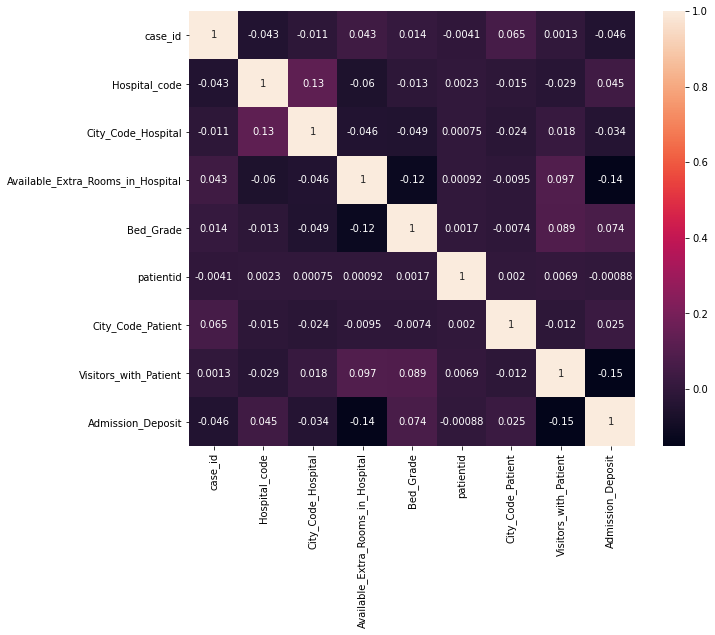

In [104]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)

Preprocess data

In [105]:
#label encode target variable
from sklearn import preprocessing
les = preprocessing.LabelEncoder()

train.Stay=les.fit_transform(train.Stay)
train.Stay

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

In [106]:
stay = train.groupby('Stay').Stay.sum()
stay

Stay
0          0
1      78139
2     174982
3     165477
4      46972
5     175090
6      16464
7      71778
8      38704
9      24885
10     66830
Name: Stay, dtype: int64

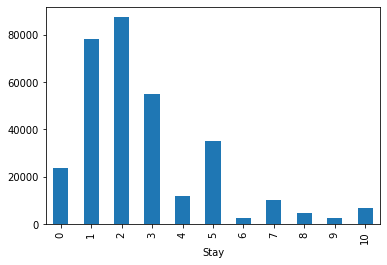

In [107]:
import matplotlib.pyplot as plt
train.groupby('Stay').Stay.count().plot.bar(ylim=0)
plt.show()

In [108]:
#label encode independent variables
le = preprocessing.LabelEncoder()

train.Hospital_type_code = le.fit_transform(train.Hospital_type_code)
train.Hospital_region_code = le.fit_transform(train.Hospital_region_code)
train.Department = le.fit_transform(train.Department)
train.Ward_Type = le.fit_transform(train.Ward_Type)
train.Ward_Facility_Code = le.fit_transform(train.Ward_Facility_Code)
train.Type_of_Admission = le.fit_transform(train.Type_of_Admission)
train.Severity_of_Illness = le.fit_transform(train.Severity_of_Illness)
train.Age = le.fit_transform(train.Age)

test.Hospital_type_code = le.fit_transform(test.Hospital_type_code)
test.Hospital_region_code = le.fit_transform(test.Hospital_region_code)
test.Department = le.fit_transform(test.Department)
test.Ward_Type = le.fit_transform(test.Ward_Type)
test.Ward_Facility_Code = le.fit_transform(test.Ward_Facility_Code)
test.Type_of_Admission = le.fit_transform(test.Type_of_Admission)
test.Severity_of_Illness = le.fit_transform(test.Severity_of_Illness)
test.Age = le.fit_transform(test.Age)

In [109]:
#convert floats to integars

train.Bed_Grade = train.Bed_Grade.astype(int)
train.City_Code_Patient = train.City_Code_Patient.astype(int)
train.Admission_Deposit = train.Admission_Deposit.astype(int)

test.Bed_Grade = test.Bed_Grade.astype(int)
test.City_Code_Patient = test.City_Code_Patient.astype(int)
test.Admission_Deposit = test.Admission_Deposit.astype(int)


In [110]:
train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2,31397,7,0,0,2,5,4911,0
1,2,2,2,5,2,2,3,3,5,2,31397,7,1,0,2,5,5954,4
2,3,10,4,1,0,2,1,3,4,2,31397,7,1,0,2,5,4745,3
3,4,26,1,2,1,2,3,2,3,2,31397,7,1,0,2,5,7272,4
4,5,26,1,2,1,2,3,3,3,2,31397,7,1,0,2,5,5558,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,3,1,5,4,86499,23,0,2,3,4,4144,1
318434,318435,24,0,1,0,2,1,1,4,4,325,8,2,2,4,8,6699,3
318435,318436,7,0,4,0,3,2,2,5,4,125235,10,0,1,3,7,4235,1
318436,318437,11,1,2,1,3,1,1,3,3,91081,8,1,1,5,1,3761,1


Define X, y and X_test

In [111]:
#define x, y and x_test
y = train.Stay.values
X = train.drop(['Stay', 'case_id', 'patientid'], axis = 1)
X_test = test.drop(['case_id', 'patientid'],axis = 1)

SMOTE

In [112]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

X, y = sm.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Split train for training and testing

In [113]:
# Split into validation and training data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.10, stratify = y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((866160, 15), (96241, 15), (866160,), (96241,))

Define model

In [114]:
# xgb classifier
from xgboost import XGBClassifier

model = XGBClassifier(objective ='multi:softmax', num_boosting_rounds=3000, max_depth=10, subsample=.5, scale_pos_weight=1,
                      min_child_weight=1, colsample_bytree=.9, gamma=.1).fit(X_train, y_train)

In [115]:
print(model.score(X_train, y_train))

0.5775376373880114


In [116]:
y_pred=model.predict(X_val)
y_pred

array([ 2,  7,  9, ...,  1, 10,  6])

In [117]:
print(model.score(X_val, y_val))

0.527436331708939


In [118]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
0,1,2
1,9,7
2,7,9
3,3,4
4,4,6
...,...,...
96236,8,8
96237,9,9
96238,2,1
96239,10,10


Confusion matrix

In [119]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_val as first argument and the preds as second argument 
confusion_matrix(y_val, y_pred)

array([[5142, 1140,  792,   82,  995,   54,  451,   55,    3,   30,    5],
       [1170, 3581, 2567,  383,  467,  346,   85,   80,   33,   24,   13],
       [ 669, 2251, 4679,  271,  496,  150,   57,   82,   36,   25,   33],
       [ 734,  989, 2166, 1400,  972, 1489,  246,  383,  197,  110,   63],
       [ 951,  370,  837,  142, 4509,  196, 1075,  300,  128,  197,   44],
       [ 408,  326,  540,  731,  378, 3530,  240, 1037,  832,  512,  216],
       [ 324,   86,  232,   45,  849,  109, 6191,  282,  231,  326,   74],
       [ 275,  105,  185,  229,  327, 1055,  395, 3623,  918, 1112,  525],
       [ 117,   33,   33,   77,   67,  346,  177,  375, 6624,  409,  492],
       [ 116,   28,   63,   68,  149,  367,  269,  490,  566, 6156,  477],
       [ 148,   54,   58,   86,  100,  329,  215,  441, 1408,  584, 5326]])

Classification report

In [120]:
#Create classification report
from sklearn.metrics import classification_report

class_report=classification_report(y_val, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.51      0.59      0.55      8749
           1       0.40      0.41      0.40      8749
           2       0.39      0.53      0.45      8749
           3       0.40      0.16      0.23      8749
           4       0.48      0.52      0.50      8749
           5       0.44      0.40      0.42      8750
           6       0.66      0.71      0.68      8749
           7       0.51      0.41      0.46      8749
           8       0.60      0.76      0.67      8750
           9       0.65      0.70      0.68      8749
          10       0.73      0.61      0.67      8749

    accuracy                           0.53     96241
   macro avg       0.52      0.53      0.52     96241
weighted avg       0.52      0.53      0.52     96241



Make predictions

In [121]:
predictions = model.predict(X_test.values)
predictions

array([0, 5, 2, ..., 2, 1, 5])

In [122]:
sample_sub

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,0-10
137055,455494,0-10


In [123]:
predictions = les.inverse_transform(predictions)
predictions

array(['0-10', '51-60', '21-30', ..., '21-30', '11-20', '51-60'],
      dtype=object)

In [124]:
final_result = pd.DataFrame({'case_id': test.case_id, 'Stay': predictions})
final_result.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [125]:
#upload submission
submission = pd.read_csv("submission.csv")
submission

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
...,...,...
137052,455491,41-50
137053,455492,0-10
137054,455493,21-30
137055,455494,11-20
